<a href="https://colab.research.google.com/github/philsaurabh/Machine-Learning-Tutorials/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load the required packages
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Machine-Learning-Tutorials/main/CLV.csv')

In [3]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
dataset.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


In [5]:
#Calculating the silhoutte coefficient

from sklearn.cluster import KMeans
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))

In [6]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)

[-868805.4785478548, -416914.67764462065, -297101.37642019434, -235524.11125640635, -194636.11556936376, -158548.7729525449, -134663.1535909525, -114907.09607423496, -101284.68637852583, -91514.9803254838, -80970.32815529814, -73219.72196344846, -67518.45040293489, -61158.83292615754, -57604.867372249, -54855.68979282414, -50137.748550112694, -48312.54633341225, -45497.41095432859]


In [7]:
# Another way
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.37211873085364955
For n_clusters=5, The Silhouette Coefficient is 0.36210339735856734
For n_clusters=6, The Silhouette Coefficient is 0.367075543561368
For n_clusters=7, The Silhouette Coefficient is 0.3732167502546604
For n_clusters=8, The Silhouette Coefficient is 0.36096076892749923
For n_clusters=9, The Silhouette Coefficient is 0.35342753458327975
For n_clusters=10, The Silhouette Coefficient is 0.34682195626197154


In [8]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

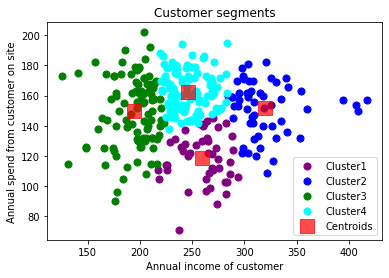

In [9]:
import matplotlib.pyplot as plt
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()